# Tema proiect nr.8

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [199]:
df=pd.read_csv('../SeturiDeDate/set_date_tema_proiect_nr08/diabetes_binary_5050split_health_indicators_BRFSS2015.csv')

In [3]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [201]:
df=df.drop_duplicates()

In [202]:
df.to_csv('diabetes_binary_cleaned_df.csv',index=False)

<Axes: xlabel='Diabetes_binary', ylabel='count'>

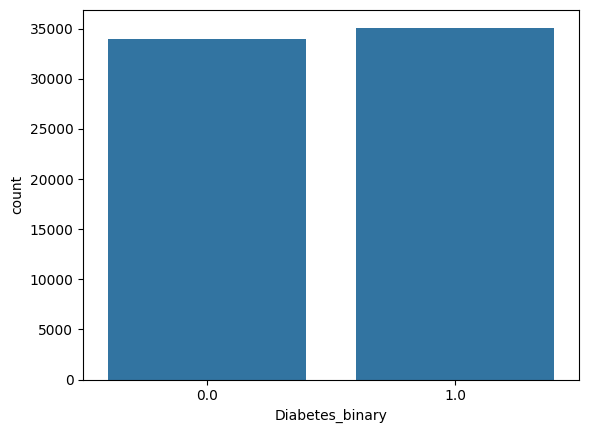

In [228]:
sns.countplot(data=df,x='Diabetes_binary')

#### Variabila tinta este Diabetes_binary. Clasele sunt balansate.

In [203]:
X=df.drop('Diabetes_binary',axis=1)
y=df['Diabetes_binary']

In [204]:
from sklearn.model_selection import train_test_split

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

In [206]:
from sklearn.preprocessing import StandardScaler

In [207]:
scaler=StandardScaler()
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.transform(X_test)







# Modelarea clasificatorilor

#### Logistic Regression

In [198]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [212]:
def logistic_regression_classifier(X,y):
    
    model_lr = LogisticRegression(random_state=21)
 
    param_grid = [
      {
        'penalty': ['l1'],
        'solver': ['liblinear'],  
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'max_iter': [100, 200, 500],
        'l1_ratio': [None]  
    },

    {
        'penalty': ['l2'],
        'solver': ['liblinear', 'saga'],  
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'max_iter': [100, 200, 500],
        'l1_ratio': [None]  
    },
    
    {
        'penalty': ['elasticnet'],
        'solver': ['saga'],  
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'max_iter': [100, 200, 500],
        'l1_ratio': [0.1, 0.5, 0.9]  
    }
]
      CV_lrclsf = GridSearchCV(estimator=model_lr, 
                          param_grid=param_grid, 
                          scoring = 'accuracy',
                          cv = 5, 
                          n_jobs = 6,
                         error_score='raise')
    
    CV_lrclsf.fit(X, y)
    
 
    return CV_lrclsf.best_params_, CV_lrclsf.best_estimator_

In [213]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

 
results_CV_paralel = []
for i in range(5):
    
    print("Iteration {0}".format(i))
    
    X_train, X_test, y_train, y_test = train_test_split(X, 
                                                        df['Diabetes_binary'], 
                                                        test_size=0.3,
                                                        stratify = df['Diabetes_binary'],
                                                        shuffle = True)
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    params,model = logistic_regression_classifier(X_train_scaled, y_train)
    
    
    y_test_pred = model.predict(X_test_scaled)
    results_CV_paralel.append({
        'accuracy_score': accuracy_score(y_true = y_test, y_pred=y_test_pred),
        'parametrii': params}
        )
    
    
print("Acuratete medie:", sum([r['accuracy_score'] for r in results_CV_paralel])/len(results_CV_paralel))

pd.DataFrame(results_CV_paralel)


Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Acuratete medie: 0.7429288541364997


,accuracy_score,parametrii
0,0.743798,"{'C': 0.1, 'l1_ratio': 0.5, 'max_iter': 100, 'penalty': 'elasticnet', 'solver': 'saga'}"
1,0.744522,"{'C': 0.01, 'l1_ratio': 0.1, 'max_iter': 100, 'penalty': 'elasticnet', 'solver': 'saga'}"
2,0.745825,"{'C': 0.01, 'l1_ratio': None, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}"
3,0.741191,"{'C': 0.1, 'l1_ratio': None, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}"
4,0.739309,"{'C': 0.1, 'l1_ratio': 0.9, 'max_iter': 100, 'penalty': 'elasticnet', 'solver': 'saga'}"


In [71]:
logistic_regression_model=LogisticRegression()

In [191]:
param_grid = [
      {
        'penalty': ['l1'],
        'solver': ['liblinear'],  
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'max_iter': [100, 200, 500],
        'l1_ratio': [None]  
    },

    {
        'penalty': ['l2'],
        'solver': ['liblinear', 'saga'],  
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'max_iter': [100, 200, 500],
        'l1_ratio': [None]  
    },
    
    {
        'penalty': ['elasticnet'],
        'solver': ['saga'],  
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'max_iter': [100, 200, 500],
        'l1_ratio': [0.1, 0.5, 0.9]  
    }
]

In [192]:
grid_search = GridSearchCV(estimator=logistic_regression_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'l1_ratio': [None], 'max_iter': [100, 200, 500],
                          'penalty': ['l1'], 'solver': ['liblinear']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'l1_ratio': [None], 'max_iter': [100, 200, 500],
                          'penalty': ['l2'], 'solver': ['liblinear', 'saga']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'l1_ratio': [0.1, 0.5, 0.9],
                          'max_iter': [100, 200, 500],
                          'penalty': ['elasticnet'], 'solver': ['saga']}],
             scoring='accuracy', verbose=1)

In [193]:
grid_search.best_estimator_

LogisticRegression(C=0.001, solver='saga')

In [194]:
grid_search.best_params_

{'C': 0.001,
 'l1_ratio': None,
 'max_iter': 100,
 'penalty': 'l2',
 'solver': 'saga'}

In [195]:
prediction_lr=grid_search.predict(scaled_X_test)

In [77]:
prediction_lr

array([0., 0., 0., ..., 0., 1., 0.])

In [78]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay

In [196]:
print(classification_report(y_test,prediction_lr))

              precision    recall  f1-score   support

         0.0       0.75      0.72      0.73     10176
         1.0       0.74      0.77      0.76     10542

    accuracy                           0.75     20718
   macro avg       0.75      0.75      0.75     20718
weighted avg       0.75      0.75      0.75     20718



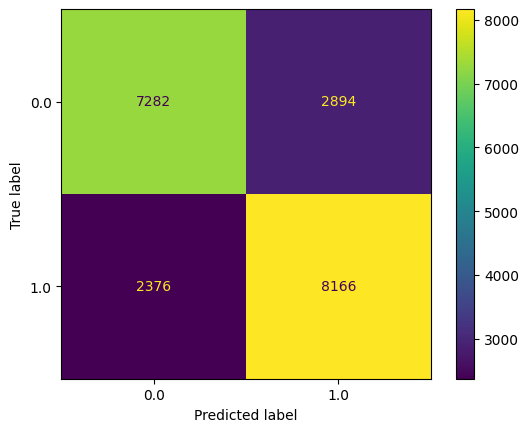

In [80]:
cm = confusion_matrix(y_test, prediction_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.classes_)
disp.plot()

### Decision Tree Classifier

In [81]:
from sklearn.tree import DecisionTreeClassifier

In [214]:
def decision_tree_classifier(X,y):

    model_dt = DecisionTreeClassifier()#random_state=42)
    
    param_grid_dt={
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}
      
    CV_dtclsf = GridSearchCV(estimator=model_dt, 
                          param_grid=param_grid_dt, 
                          scoring = 'accuracy',
                          cv = 5, 
                          n_jobs = 6,
                         error_score='raise')
   
    CV_dtclsf.fit(X, y)
      
    return CV_dtclsf.best_params_, CV_dtclsf.best_estimator_

In [216]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# 5 iteratii 
results_CV_paralel = []
for i in range(5):
    
    print("Iteration {0}".format(i))
   
    X_train, X_test, y_train, y_test = train_test_split(X, 
                                                        df['Diabetes_binary'], 
                                                        test_size=0.3,
                                                       stratify = df['Diabetes_binary'],
                                                       shuffle = True)
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    params,model = decision_tree_classifier(X_train_scaled, y_train)
   
    y_test_pred = model.predict(X_test_scaled)
    results_CV_paralel.append({
        'accuracy_score': accuracy_score(y_true = y_test, y_pred=y_test_pred),
        'parametrii': params}
        )
    
    
print("Acuratete medie:", sum([r['accuracy_score'] for r in results_CV_paralel])/len(results_CV_paralel))

pd.DataFrame(results_CV_paralel)

Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Acuratete medie: 0.7343565981272324


,accuracy_score,parametrii
0,0.735882,"{'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5}"
1,0.734916,"{'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 10}"
2,0.733468,"{'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}"
3,0.733131,"{'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 5}"
4,0.734386,"{'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 5}"


In [82]:
decidion_tree_model=DecisionTreeClassifier()

In [83]:
param_grid_dt={
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

In [84]:
grid_search_dt=GridSearchCV(estimator=decidion_tree_model,param_grid=param_grid_dt, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

In [85]:
grid_search_dt.fit(scaled_X_train,y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [86]:
grid_search_dt.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4,
                       min_samples_split=10)

In [87]:
grid_search_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': None,
 'min_samples_leaf': 4,
 'min_samples_split': 10}

In [88]:
predictions_dt=grid_search_dt.predict(scaled_X_test)

In [89]:
print(classification_report(y_test,predictions_dt))

              precision    recall  f1-score   support

         0.0       0.75      0.69      0.72     10176
         1.0       0.72      0.78      0.75     10542

    accuracy                           0.74     20718
   macro avg       0.74      0.73      0.73     20718
weighted avg       0.74      0.74      0.73     20718



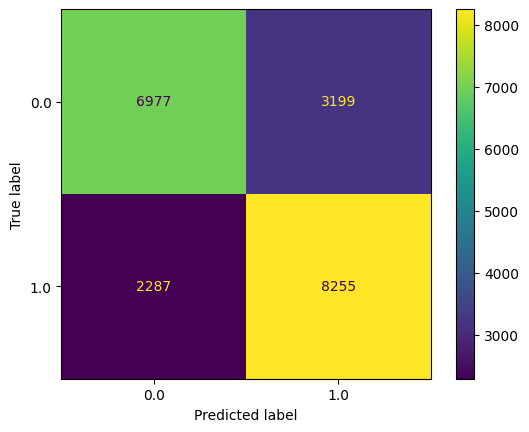

In [90]:
cm = confusion_matrix(y_test, predictions_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.classes_)
disp.plot()

### Random Forest Classifier

In [91]:
from sklearn.ensemble import RandomForestClassifier

In [217]:
def random_forest_classifier(X,y):
    
    model_rf = RandomForestClassifier()#random_state=42)
   
    param_grid_rf= {
    'n_estimators': [64,100,128,200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20],
    'bootstrap':[True,False],
    'max_features': ['sqrt', 'log2'] 
}
   
    CV_rfclsf = GridSearchCV(estimator=model_rf, 
                          param_grid=param_grid_rf, 
                          scoring = 'accuracy',
                          cv = 5, 
                          n_jobs = 6,
                         error_score='raise')
   
    CV_rfclsf.fit(X, y)
    
    return CV_rfclsf.best_params_, CV_rfclsf.best_estimator_

In [218]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# 5 iteratii 
results_CV_paralel = []
for i in range(5):
    
    print("Iteration {0}".format(i))
   
    X_train, X_test, y_train, y_test = train_test_split(X, 
                                                        df['Diabetes_binary'], 
                                                        test_size=0.3,
                                                       stratify = df['Diabetes_binary'],
                                                       shuffle = True)
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    params,model = random_forest_classifier(X_train_scaled, y_train)
    
    y_test_pred = model.predict(X_test_scaled)
    results_CV_paralel.append({
        'accuracy_score': accuracy_score(y_true = y_test, y_pred=y_test_pred),
        'parametrii': params}
        )
    
    
print("Acuratete medie:", sum([r['accuracy_score'] for r in results_CV_paralel])/len(results_CV_paralel))

pd.DataFrame(results_CV_paralel)

Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Acuratete medie: 0.7474852785017858


,accuracy_score,parametrii
0,0.743798,"{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}"
1,0.747611,"{'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 128}"
2,0.749059,"{'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 64}"
3,0.748431,"{'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 100}"
4,0.748528,"{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 200}"


In [92]:
randon_forest_model=RandomForestClassifier()

In [93]:
param_grid_rf= {
    'n_estimators': [64,100,128,200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20],
    'bootstrap':[True,False],
    'max_features': ['sqrt', 'log2'] 
}

In [94]:
grid_search_rf=GridSearchCV(estimator=randon_forest_model,param_grid=param_grid_rf,cv=5,scoring='accuracy',verbose=1)

In [95]:
grid_search_rf.fit(scaled_X_train,y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [64, 100, 128, 200]},
             scoring='accuracy', verbose=1)

In [96]:
grid_search_rf.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=200)

In [97]:
grid_search_rf.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [98]:
predictions_rf=grid_search_rf.predict(scaled_X_test)

In [99]:
print(classification_report(y_test,predictions_rf))

              precision    recall  f1-score   support

         0.0       0.77      0.69      0.73     10176
         1.0       0.73      0.80      0.76     10542

    accuracy                           0.75     20718
   macro avg       0.75      0.75      0.75     20718
weighted avg       0.75      0.75      0.75     20718



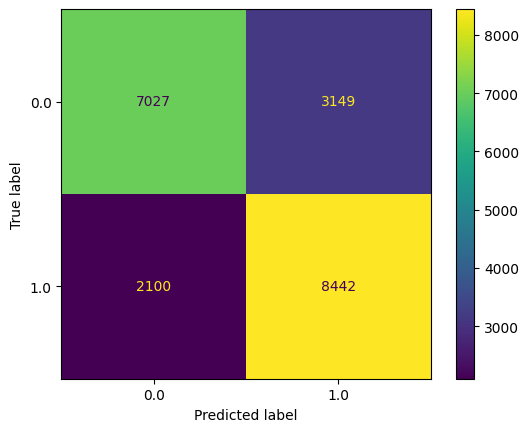

In [178]:
cm = confusion_matrix(y_test, predictions_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.classes_)
disp.plot()

### Support Vector Machine

In [100]:
from sklearn. svm import SVC

In [219]:
def svmclassifier(X,y):
   
    model_svm = SVC(random_state=21)
    
    param_grid_svc = {
     'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
    
}
       
    CV_svmclsf = GridSearchCV(estimator=model_svm, 
                          param_grid=param_grid_svc, 
                          scoring = 'accuracy', # aici e diferenta fata de clasificator - metrica aleasa pentru evaluare
                          cv = 5, 
                          n_jobs = 6,
                         error_score='raise')
    
    CV_svmclsf.fit(X, y)
 
    return CV_svmclsf.best_params_, CV_svmclsf.best_estimator_

In [223]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# 5 iteratii 
results_CV_paralel = []
for i in range(5):
    
    print("Iteration {0}".format(i))
    # Split dataset în set de antrenament și set de test 
    X_train, X_test, y_train, y_test = train_test_split(X, 
                                                        df['Diabetes_binary'], 
                                                        test_size=0.3,
                                                       stratify = df['Diabetes_binary'],
                                                       shuffle = True)
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    params,model = svmclassifier(X_train_scaled, y_train)
    
    # prognozăm cu cel mai bun model
    y_test_pred = model.predict(X_test_scaled)
    results_CV_paralel.append({
        'accuracy_score': accuracy_score(y_true = y_test, y_pred=y_test_pred),
        'parametrii': params}
        )
    
    
print("Acuratete medie:", sum([r['accuracy_score'] for r in results_CV_paralel])/len(results_CV_paralel))

pd.DataFrame(results_CV_paralel)

Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Acuratete medie: 0.746452360266435


,accuracy_score,parametrii
0,0.744425,"{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}"
1,0.746983,"{'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}"
2,0.743025,"{'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}"
3,0.747032,"{'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}"
4,0.750796,"{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}"


In [101]:
svm_model=SVC()

In [102]:
param_grid_svc = {
     'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
    
}

In [103]:
grid_search_svc=GridSearchCV(estimator=svm_model,param_grid=param_grid_svc,cv=5,scoring='accuracy',verbose=1,n_jobs=-1)

In [104]:
grid_search_svc.fit(scaled_X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy', verbose=1)

In [105]:
 grid_search_svc.best_estimator_

SVC(C=1)

In [106]:
grid_search_svc.best_params_

{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}

In [107]:
predictions=grid_search_svc.predict(scaled_X_test)

In [108]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.77      0.68      0.73     10176
         1.0       0.72      0.81      0.76     10542

    accuracy                           0.75     20718
   macro avg       0.75      0.74      0.74     20718
weighted avg       0.75      0.75      0.74     20718



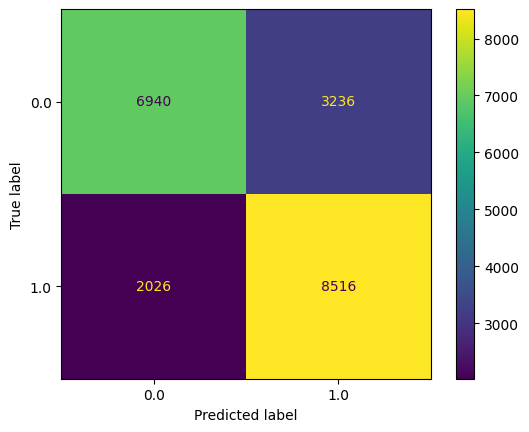

In [179]:
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.classes_)
disp.plot()

### Gradient Boosting

In [110]:
from sklearn.ensemble import GradientBoostingClassifier

In [221]:
def gradient_boosting_classifier(X,y):
    
    # instațiem un model
    model_gb = GradientBoostingClassifier(random_state=21)
    
    # setăm parametrii pe care vrem să îi încercăm
    param_grid_gb={
    "n_estimators":[100,150,200,300],
    'max_depth':[3,4,5,6],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_features':['sqrt','log2']
}
    # folosim  antrenare cu validare încrucișată
    CV_gbclsf = GridSearchCV(estimator=model_gb, 
                          param_grid=param_grid_gb, 
                          scoring = 'accuracy', # aici e diferenta fata de clasificator - metrica aleasa pentru evaluare
                          cv = 5, 
                          n_jobs = 6,
                         error_score='raise')
    # pasul de antrenare
    CV_gbclsf.fit(X, y)
    
    # returnăm cei mai buni parametrii și cel mai bun model
    return CV_gbclsf.best_params_, CV_gbclsf.best_estimator_

In [222]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# 5 iteratii 
results_CV_paralel = []
for i in range(5):
    
    print("Iteration {0}".format(i))
    # Split dataset în set de antrenament și set de test 
    X_train, X_test, y_train, y_test = train_test_split(X, 
                                                        df['Diabetes_binary'], 
                                                        test_size=0.3,
                                                       stratify = df['Diabetes_binary'],
                                                       shuffle = True)
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    params,model = gradient_boosting_classifier(X_train_scaled, y_train)
    
    # prognozăm cu cel mai bun model
    y_test_pred = model.predict(X_test_scaled)
    results_CV_paralel.append({
        'accuracy_score': accuracy_score(y_true = y_test, y_pred=y_test_pred),
        'parametrii': params}
        )
    
    
print("Acuratete medie:", sum([r['accuracy_score'] for r in results_CV_paralel])/len(results_CV_paralel))

pd.DataFrame(results_CV_paralel)

Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Acuratete medie: 0.7483347813495511


,accuracy_score,parametrii
0,0.749879,"{'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 300}"
1,0.750845,"{'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 150}"
2,0.746645,"{'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 300}"
3,0.747756,"{'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 300}"
4,0.746549,"{'learning_rate': 0.2, 'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 300}"


In [111]:
gradient_model=GradientBoostingClassifier()

In [168]:
param_grid_gb={
    "n_estimators":[100,150,200,300],
    'max_depth':[3,4,5,6],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_features':['sqrt','log2']
}

In [169]:
gridg_search_gb=GridSearchCV(estimator=gradient_model,param_grid=param_grid_gb,cv=5,scoring='accuracy',verbose=1,n_jobs=-1)

In [170]:
gridg_search_gb.fit(scaled_X_train,y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5, 6],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 150, 200, 300]},
             scoring='accuracy', verbose=1)

In [171]:
gridg_search_gb.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [173]:
predictions_gb=gridg_search_gb.predict(scaled_X_test)

In [174]:
print(classification_report(y_test,predictions_gb))

              precision    recall  f1-score   support

         0.0       0.77      0.69      0.73     10176
         1.0       0.73      0.80      0.76     10542

    accuracy                           0.75     20718
   macro avg       0.75      0.75      0.75     20718
weighted avg       0.75      0.75      0.75     20718



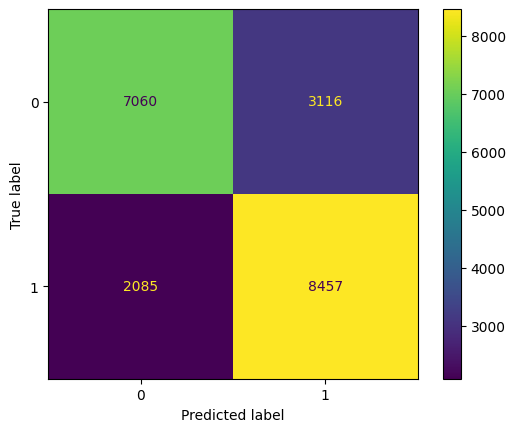

In [181]:
cm = confusion_matrix(y_test, predictions_gb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [118]:
from sklearn.metrics import accuracy_score

In [182]:
results=[]
results.append({
    'Classifier':'SVM',
    'Accuracy':accuracy_score(y_test,predictions),
    'Best Parameters':grid_search_svc.best_params_
})

results.append({
    'Classifier':'Decision Tree',
    'Accuracy':accuracy_score(y_test,predictions_dt),
    'Best Parameters':grid_search_dt.best_params_
})

results.append({
    'Classifier':'Random Forest',
    'Accuracy':accuracy_score(y_test,predictions_rf),
    'Best Parameters':grid_search_rf.best_params_
})

results.append({
    'Classifier':'Gradient Boosting',
    'Accuracy':accuracy_score(y_test,predictions_gb),
    'Best Parameters':gridg_search_gb.best_params_
})

results.append({
    'Classifier':'Logistic Regression',
    'Accuracy':accuracy_score(y_test,prediction_lr),
    'Best Parameters':grid_search.best_params_
})

In [183]:
results_df=pd.DataFrame(results)
pd.set_option('display.max_colwidth', None)

In [184]:
results_df

,Classifier,Accuracy,Best Parameters
0,SVM,0.746018,"{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}"
1,Decision Tree,0.735206,"{'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}"
2,Random Forest,0.746645,"{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}"
3,Gradient Boosting,0.748962,"{'learning_rate': 0.1, 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 100}"
4,Logistic Regression,0.745632,"{'C': 0.001, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}"
